In [3]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '06')

In [7]:
#  3. Convert the June temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '06').all()

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jundf = pd.DataFrame(results, columns=['date','temps'])

In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jundf.describe()

,temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '12')

In [11]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '12').all()

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
decdf = pd.DataFrame(results, columns=['date','temps'])

In [13]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
decdf.describe()

,temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Stuff for readme

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Oahu Temperatures in June and December'}, xlabel='Temperature °F', ylabel='Frequency'>

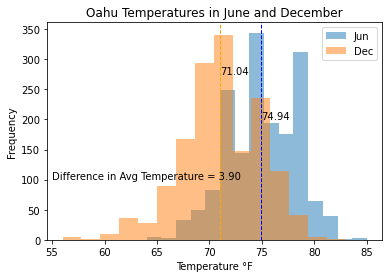

In [32]:
# TEMPERATURE SEEMS TO BE IN FAHRENHEIT
ax = jundf.plot.hist(bins=15,alpha=.5)
decdf.plot.hist(bins=15,alpha=.5,ax=ax)
ax.legend(['Jun','Dec'])
ax.set(title='Oahu Temperatures in June and December',xlabel='Temperature °F')
ax.axvline(x=jundf['temps'].mean(), color='blue', linestyle='dashed', linewidth=1)
ax.text(jundf['temps'].mean(),200,round(jundf['temps'].mean(),2))
ax.axvline(x=decdf['temps'].mean(), color='orange', linestyle='dashed', linewidth=1)
ax.text(decdf['temps'].mean(),275,round(decdf['temps'].mean(),2))
ax.text(55,100,'Difference in Avg Temperature = 3.90')
ax

In [34]:
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == '12').all()
raindecdf = pd.DataFrame(results, columns=['date','prcp'])
raindecdf['prcp']

0       0.04
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
1512    0.14
1513    0.14
1514    1.03
1515    2.37
1516    0.90
Name: prcp, Length: 1517, dtype: float64

In [35]:
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == '06').all()
rainjundf = pd.DataFrame(results, columns=['date','prcp'])

Text(0.47, 700, 'Difference in Average Daily Rainfall = .08')

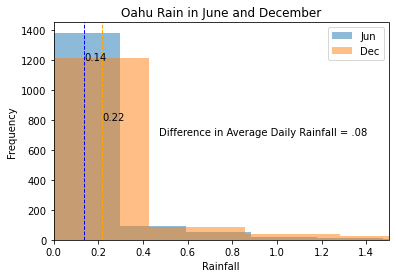

In [36]:
# I DO NOT KNOW IF RAINFALL IS IN INCHES, CM, OR SOMETHING ELSE
ax = rainjundf.plot.hist(bins=15,alpha=.5)
raindecdf.plot.hist(bins=15,alpha=.5,ax=ax)
ax.legend(['Jun','Dec'],)
ax.set(title='Oahu Rain in June and December',xlabel='Rainfall',xlim=(0,1.5))
ax.axvline(x=rainjundf['prcp'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.text(rainjundf['prcp'].mean(),1200,round(rainjundf['prcp'].mean(),2))
ax.axvline(x=raindecdf['prcp'].mean(), color='orange', linestyle='dashed', linewidth=1)
plt.text(raindecdf['prcp'].mean(),800,round(raindecdf['prcp'].mean(),2))
plt.text(.47,700,"Difference in Average Daily Rainfall = .08")

In [37]:
results = session.query(Station.station, Station.elevation).all()

In [38]:
elevationsdf = pd.DataFrame(results, columns=['Station','Elevation'])

In [39]:
results = session.query(Measurement.station, Measurement.tobs).filter(extract('month', Measurement.date) == '06').all()
jundf = pd.DataFrame(results, columns=['Station','Temps'])

In [40]:
# I DO NOT KNOW IF ELEVATION IS IN FEET OR METERS OR SOMETHING ELSE
juntempelevdf = jundf.merge(elevationsdf, on='Station')
juntempelevdf = juntempelevdf.groupby(by='Station').mean()
juntempelevdf

,Temps,Elevation
Station,,
USC00511918,74.139394,0.9
USC00513117,74.050847,14.6
USC00514830,76.005376,7.0
USC00516128,71.937220,152.4
USC00517948,76.655405,11.9
USC00518838,73.394737,306.6
USC00519281,73.271186,32.9
USC00519397,77.559322,3.0
USC00519523,76.668103,19.5


<AxesSubplot:title={'center':'Average Temperature by Elevation per Station (Jun and Dec)'}, xlabel='Temperature °F', ylabel='Elevation'>

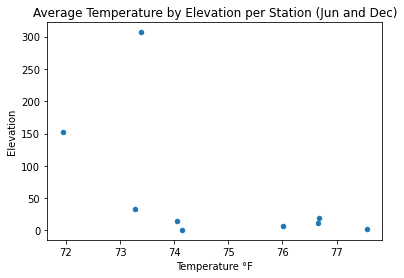

In [41]:
juntempelevdf.plot(kind='scatter',x='Temps',y='Elevation',xlabel='Temperature °F',title='Average Temperature by Elevation per Station (Jun and Dec)')